# Logistic Regression - Supervised Machine Learning - Classification

## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

For each record in the dataset it is provided: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. 


- Triaxial Angular velocity from the gyroscope. 


- A 561-feature vector with time and frequency domain variables. 


- Its activity label. 

More information about the features is available on the website above.

In [3]:
import os, seaborn as sns, pandas as pd, numpy as np

## Feature Engineering Basics

Import the data and do the following:

* Examine the data types--there are many columns, so it might be wise to use value counts


* Determine if the floating point values need to be scaled


* Determine the breakdown of each activity


* Encode the activity label as an integer as Classification requires integers and not strings

In [4]:
filepath = 'Human_Activity_Recognition_Using_Smartphones_Data.csv'
data = pd.read_csv(filepath, sep=',')

The data columns are all floats except for the activity label.

In [5]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

### Scaled Values

The data are all scaled from -1 (minimum) to 1.0 (maximum).

In [7]:
data.iloc[:, :-1].min().value_counts()

-1.0    561
dtype: int64

In [8]:
data.iloc[:, :-1].max().value_counts()

1.0    561
dtype: int64

Examine the breakdown of activities--they are relatively balanced.

In [10]:
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

## Scikit Learn Classifiers

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.  
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)

4903    2
3562    4
6325    1
7920    3
8403    5
Name: Activity, dtype: int64

## Correlation Analysis

* Calculate the correlations between the dependent variables.


* Create a histogram of the correlation values


* Identify those that are most correlated (either positively or negatively).

In [32]:
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal as they are the same as the upper
tril_index = np.tril_indices_from(corr_values)
tril_index

(array([  0,   1,   1, ..., 560, 560, 560]),
 array([  0,   0,   1, ..., 558, 559, 560]))

In [33]:
# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
corr_values

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,NaN,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,NaN,NaN,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,NaN,NaN,NaN,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
tBodyAcc-std()-X,NaN,NaN,NaN,NaN,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
tBodyAcc-std()-Y,NaN,NaN,NaN,NaN,NaN,0.888259,0.918561,0.997510,0.887052,0.911137,...,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.112454,-0.007095,-0.006444,-0.015380
"angle(tBodyGyroJerkMean,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024822,-0.004582,-0.012549
"angle(X,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.748249,-0.635231
"angle(Y,gravityMean)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.545614


In [34]:
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting (we only care about the magnitude)
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [36]:
corr_values.head()

,feature1,feature2,correlation,abs_correlation
0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,0.128037,0.128037
1,tBodyAcc-mean()-X,tBodyAcc-mean()-Z,-0.230302,0.230302
2,tBodyAcc-mean()-X,tBodyAcc-std()-X,0.004590,0.004590
3,tBodyAcc-mean()-X,tBodyAcc-std()-Y,-0.016785,0.016785
4,tBodyAcc-mean()-X,tBodyAcc-std()-Z,-0.036071,0.036071


A histogram of the absolute value correlations to look at the higher and lower correlations

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

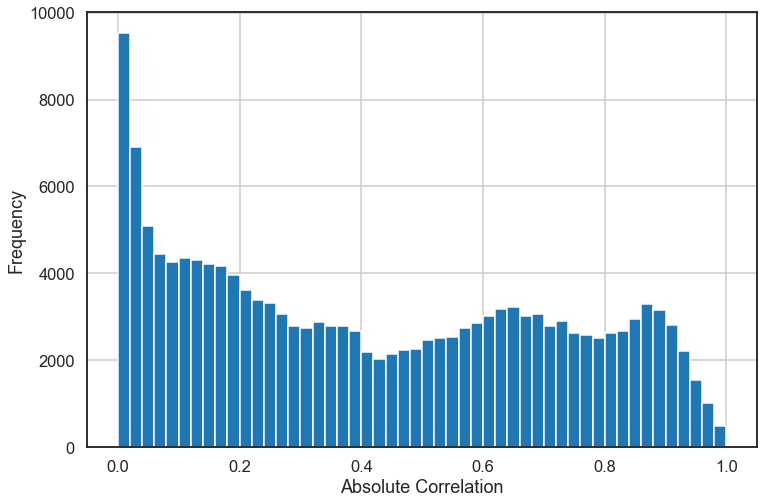

In [16]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

### The most highly correlated values

In [17]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


## Train-Test Split for Classification

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.


* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.


In [38]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

## we can call next as it is a generator object
train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [39]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [20]:
y_test.value_counts(normalize=True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

# Logistic Regression

<div>
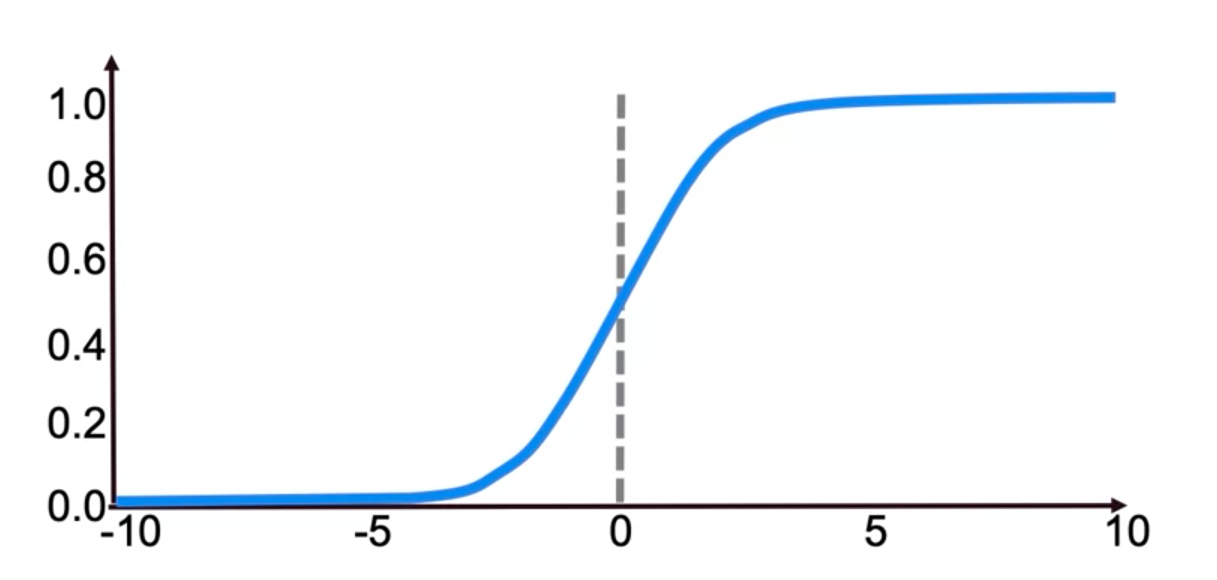
</div>

### Sigmoid Function

Takes our original regression function and wraps it into its own function:

$$\sigma(x) = y = \frac{1}{1 + e^{-x}}$$

where, 

$x$ represents our original regression function the sigmoid function will always take on values between 0 and 1 no matter the value of x

- this smooths out the effects of high or low (extreme) values of x

### Logistic Regression

$$\sigma(x) = y_{\beta}(x) = \frac{1}{1+e^{-(\beta_0 + \beta_1 x + \epsilon)}}$$

**Logistic function:**

$$P(x)= \frac{1}{1+e^{-(\beta_0 + \beta_1 x + \epsilon)}}$$

Can be thought of as the probability of the same being in a certain class versus others.

$$P(x) = \frac{e^{(\beta_0 + \beta_1 x + \epsilon)}}{1+e^{(\beta_0 + \beta_1 x + \epsilon)}}$$

**Odds Ratio:** 

We are trying to isolate what the linear function does.

$$\frac{P(x)}{1-P(x)} = e^{(\beta_0 + \beta_1 x)}$$

We now turned our probability into an odds ratio.

**Log Odds Ratio:** 

gives us the linear function of x

$$\ln \Big[\frac{P(x)}{1-P(x)} \Big] = \beta_0 + \beta_1 x$$

## Decision Boundary

### Two Classes

<div>
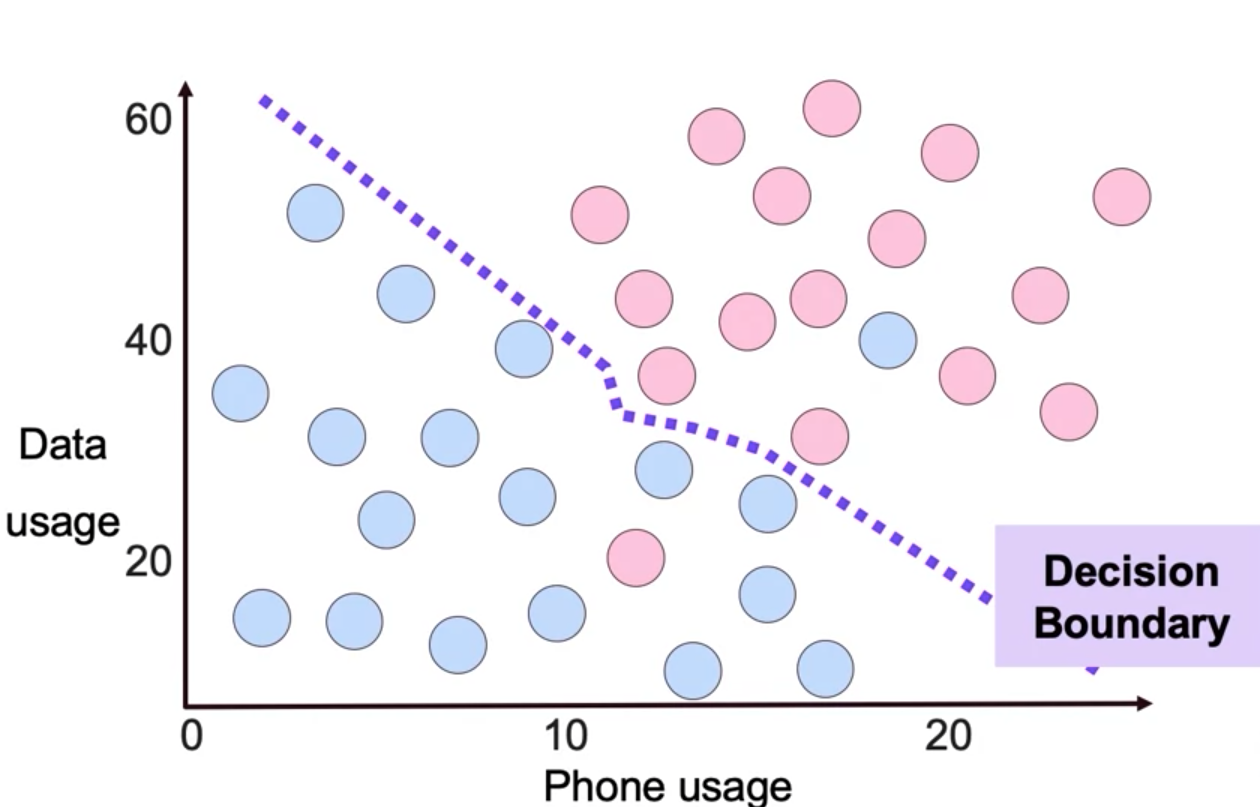
</div>

### Multi Class and One vs. All

<div>
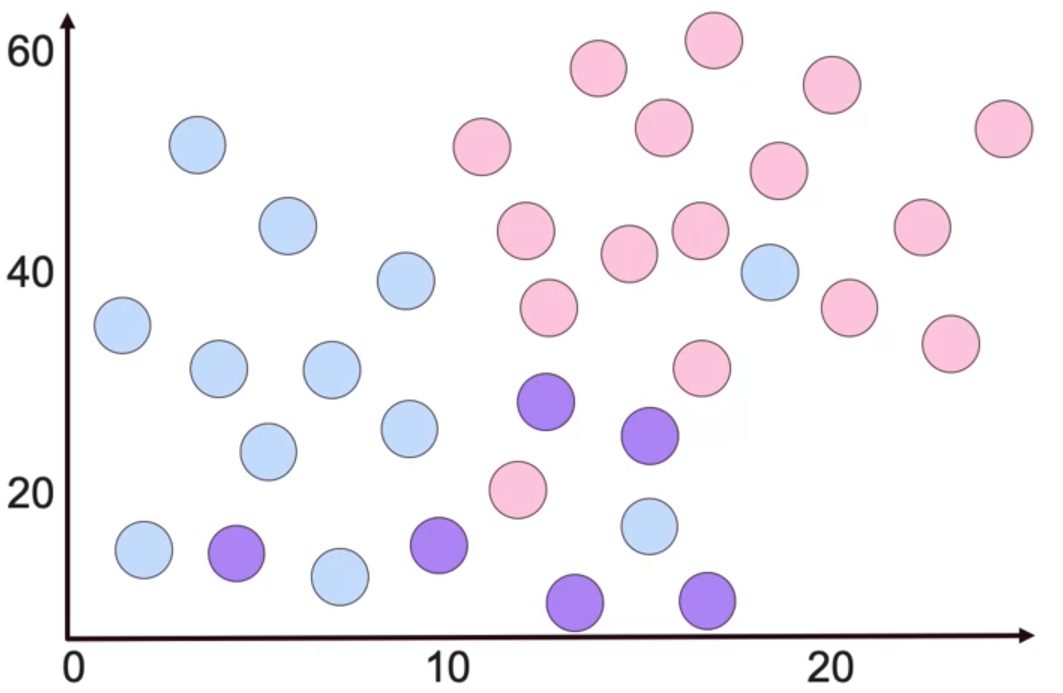
</div>

We take **one class** and say that all else is going to be our **other class** and we can fit a **logistic Regression** which will define the **decision boundary** of the one class vs. all other and the do it again for all other classes.

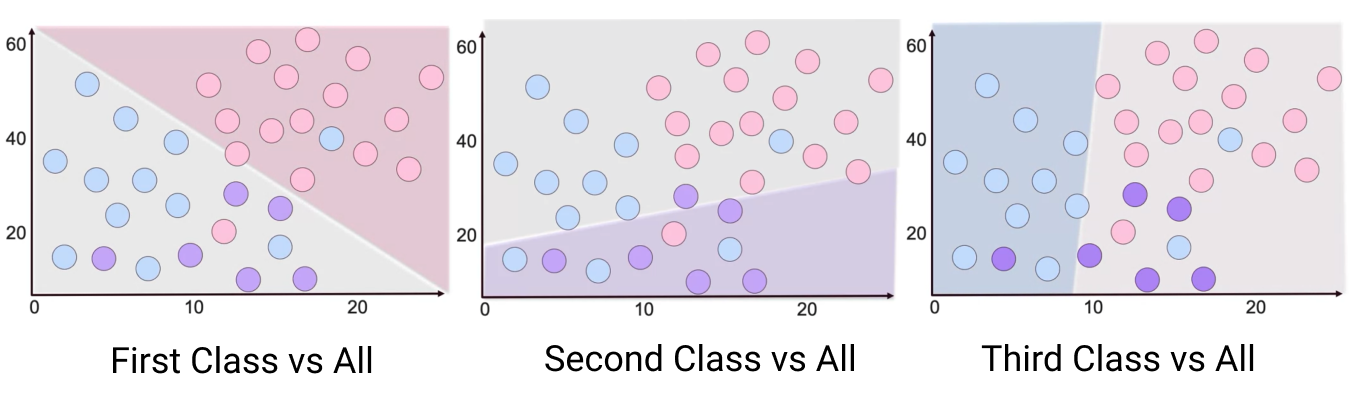

We end up with K-Logistic models (in this case K=3) splitting out K probabilities, one for each class, and the estimated category is going to be the class with the **highest estimated probability for each one of these, one vs. all**.

We end up with K seaparate decision boundaries, and in our case we end up with 3 decision boundaries, given the highest probability of each of of our separate 3 logistic regression problems.

<div>
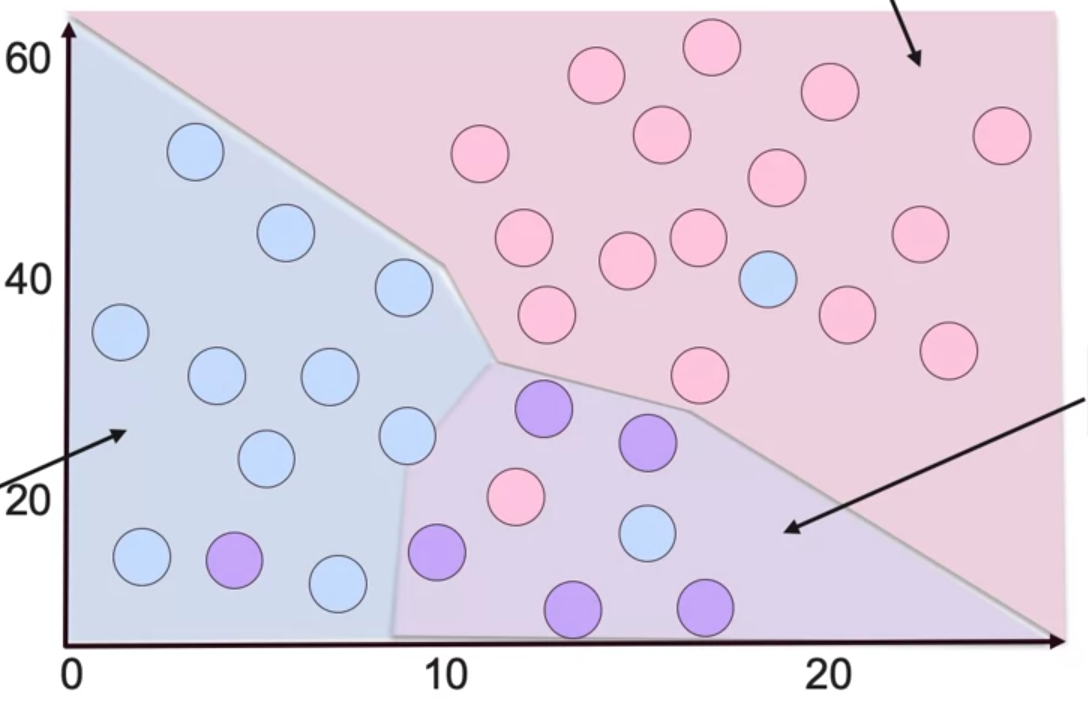
</div>

## Fitting Logistic Regression Models

* Fit a logistic regression model without any regularization using all of the features and store the model.


* Using cross validation to determine the hyperparameters, fit models using L1, and L2 regularization. Store each of these models as well. Note the limitations on multi-class models, solvers, and regularizations. The regularized models, in particular the L1 model, will probably take a while to fit.

#### No Regularization Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

#### L1 Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

#### L2 Logistic Regression

In [23]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

## One Versus Rest Fitting

Compare the magnitudes of the coefficients for each of the models. If one-vs-rest fitting was used, each set of coefficients can be plotted separately. 

In [40]:
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    # get the coefficients
    coeffs = mod.coef_
    
    # create multilevel index with 0 vs the rest used
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
435  0.009718  0.252145  0.100116  0.097112  0.297672  0.155978 -0.005522   
514  0.115507  0.286618 -0.201538 -0.614130 -0.196914  0.343371  0.096662   
28   0.098610  0.059819 -0.380409 -0.830660  1.064626 -0.787021  0.673721   
98  -0.008272  0.150489  0.159255 -0.077818  0.171983 -0.038043 -0.133843   
80   0.033614  0.014859 -0.235214 -0.088627 -0.174231 -0.422457  0.000000   
393 -0.027172  0.081383  0.012232  0.169257 -0.088692 -0.278159 -0.067400   
379  0.031543 -0.270379  0.091368  0.784807 -0.230341 -0.425985  0.000000   
257 -0.030255 -0.188538  0.091225  0.246753 -0.056220 -0.298604  0.000000   
115  0.041774 -0.483296  0.491087 -0.043830  0.382028 -0.591194  0.000000   
546 -0.013497 -0.067763  0.208686 -0.158158  0.210897 -0.292886  0.000000   

                                                        l2            \
            1    2         3         4         5         0         1   
435  1.448506  0.0  0.000000  0.425131  0.409244  0.003103  1.806088   
514  0.697261  0.0 -0.235430  0.000000  0.443146  0.149221  0.704165   
28   0.000000  0.0 -2.200966  3.709085 -4.894854  0.136814  0.794329   
98   0.000000  0.0  0.000000  0.103801  0.029225 -0.033942  0.394266   
80   0.000000  0.0  0.000000 -0.718677 -2.044082  0.057374 -0.516773   
393  0.000000  0.0  0.000000  0.000000 -0.489087 -0.063731  0.216144   
379 -0.014974  0.0  1.951124 -0.666993 -1.648944  0.088168  0.995514   
257  0.000000  0.0  0.000000  0.000000 -0.232231 -0.056422 -1.189088   
115  0.000000  0.0  0.000000  1.507262 -4.397780  0.079358  0.777572   
546  0.000000  0.0  0.000000  0.070553 -0.385880 -0.029954 -0.177369   

                                             
            2         3         4         5  
435 -0.125655  0.152744  0.546362  0.338355  
514 -0.292478 -1.638309 -0.377963  0.753689  
28  -0.442644 -2.165990  1.974723 -1.987490  
98   0.194178 -0.247415  0.268304 -0.054924  
80  -0.403578 -0.512309 -0.482219 -1.252302  
393 -0.007847  0.689507 -0.199035 -0.592022  
379  0.052220  1.775426 -0.243294 -1.010422  
257  0.200247  0.634171 -0.072268 -0.677470  
115  0.530279 -0.084591  0.745007 -1.197748  
546  0.280612 -0.569926  0.380336 -0.570473

Prepare six separate plots for each of the multi-class coefficients.

`.xs` Return cross-section from the Series/DataFrame.

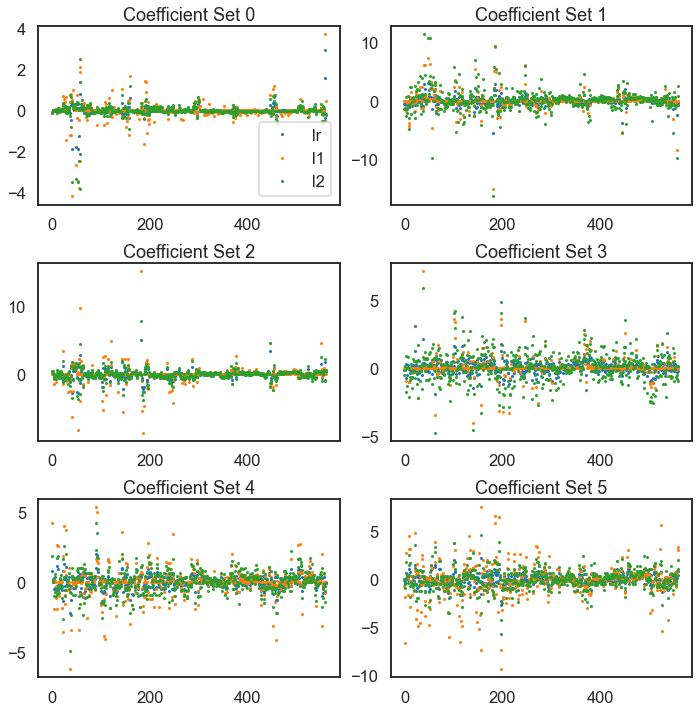

In [41]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    # if it is our first value add legend
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()

## Class Prediction for Each Model

* Predict and store the class for each model.


* Store the probability for the predicted class for each model. 

In [52]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    # predict using the appropriate label
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]],
                                       codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    
    # get the max probability for the class 
    # y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
    y_prob.append(pd.DataFrame(mod.predict_proba(X_test), columns=coeff_label))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


We can see for each observatin what the highest probability for the class is:

In [51]:
y_prob.head()

lr                                                                    \
          0             1             2             3         4             5   
0  0.000034  1.683463e-04  5.675967e-04  9.989388e-01  0.000006  2.845352e-04   
1  0.000037  3.211725e-07  4.237865e-06  1.424924e-04  0.011650  9.881654e-01   
2  0.000036  4.352783e-03  2.962605e-06  9.875917e-01  0.005011  3.006539e-03   
3  0.000223  9.813812e-01  1.838389e-02  1.419744e-07  0.000012  1.288314e-12   
4  0.998277  1.717719e-03  3.008377e-09  2.088885e-07  0.000005  1.393959e-10   

         l1                                                          \
          0             1             2             3             4   
0  0.000004  5.790663e-06  1.023410e-03  9.989663e-01  6.808503e-10   
1  0.000008  1.067812e-08  1.141489e-07  4.193400e-05  5.023061e-04   
2  0.000001  3.716984e-03  2.261279e-07  9.954823e-01  7.986886e-04   
3  0.000001  9.992045e-01  7.943902e-04  1.811181e-11  4.009341e-10   
4  0.999924  7.563839e-05  2.604209e-14  3.187299e-10  6.874277e-11   

                           l2                                            \
              5             0             1             2             3   
0  3.122637e-09  1.236526e-07  2.086850e-08  2.425594e-04  9.997567e-01   
1  9.994476e-01  2.671232e-07  5.697804e-14  1.394029e-07  1.036596e-09   
2  3.260899e-07  1.838145e-07  7.100165e-05  1.415547e-07  9.996675e-01   
3  3.221811e-27  1.315053e-07  9.943386e-01  5.661217e-03  9.063625e-17   
4  1.610866e-23  9.999973e-01  2.658669e-06  5.060061e-12  9.986381e-16   

                               
              4             5  
0  3.828779e-09  5.807299e-07  
1  5.224925e-04  9.994771e-01  
2  2.352663e-04  2.586166e-05  
3  2.206099e-09  2.245768e-21  
4  1.708711e-09  8.447005e-19

# Classification Error Metrics

## 1. Confusion Matrix

A confusion matrix tabulates true positives, false negatives, false positives and true negatives.

- The **Vertical Axis** contains rows that correspond to the ground truth (positive or negative)


- The **Horizonatal Axis** (columns) corresponds to what the model ends up predicting (either true or false)


- The **Blue Diagonal** are correctly predicted values


- The **Red Diagonal** are the elements corresponding to the errors


- **Type I Error:** is a False Positive


- **Type II Error:** is a False Negative

<div>
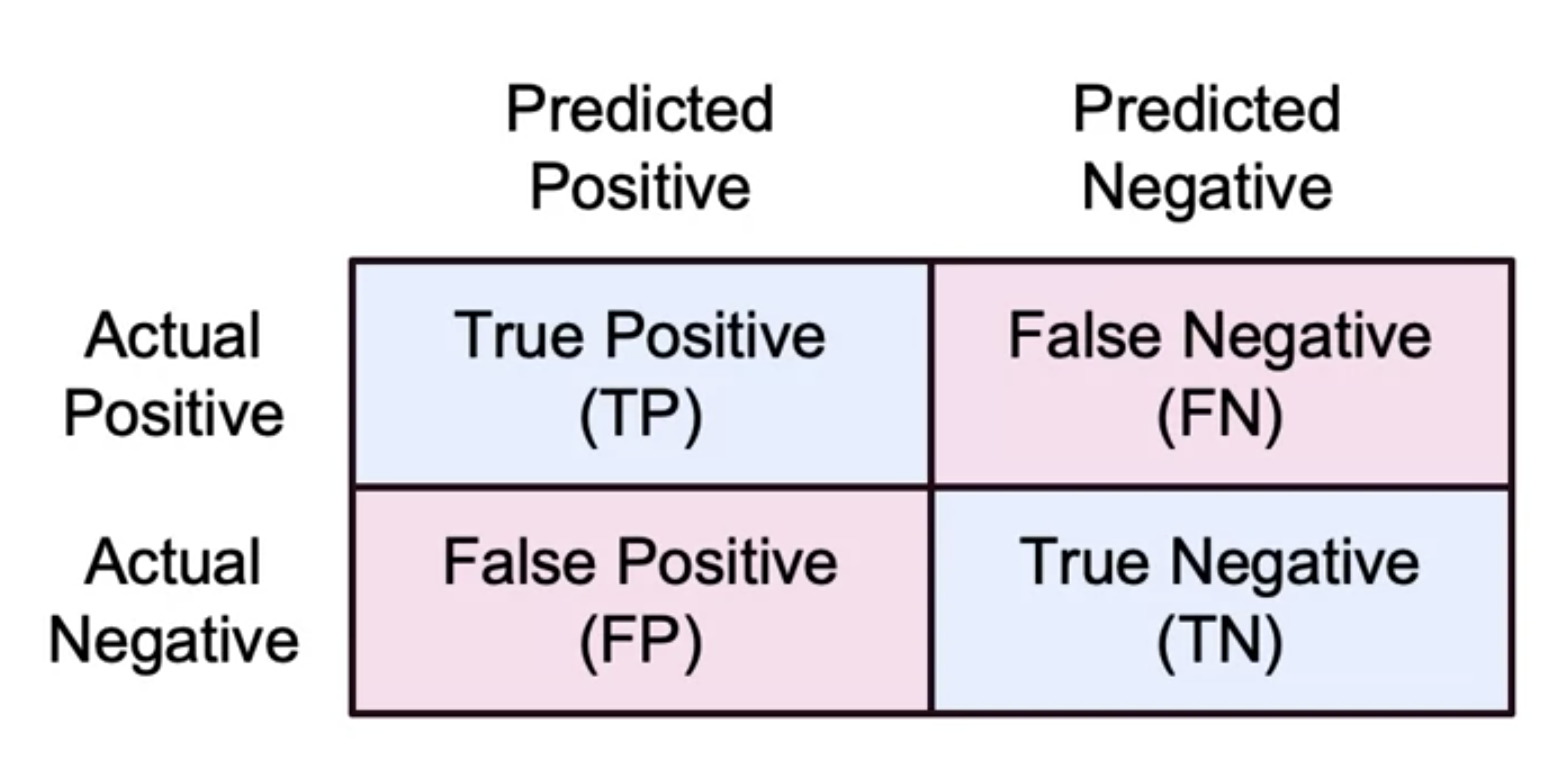
</div>

## Measures for the Confusion Matrix

### a. Accuracy:

To measure how well we classified overall but can be heavily thrown off by skewed data. Accuracy is defined as the ratio of true postives and true negatives divided by the total number of observations. It is a measure related to predicting correctly positive and negative instances.

$$\text{Accuracy} = \frac{TP + TN}{TP+FN+FP+TN}$$

### b. Precision

Which is out of all our predicted positive, how many did we get correct? Precision is the ratio of true positive divided by total of predicted positives. The closer this value is to 1.0, the better job this model does at identifying only positive instances.

$$ \text{Precision} = \frac{TP}{TP + FP} $$

### c. Recall or Sensitivity

In the denominator we have all the **actual positives**, out of all our actual positives, which ones did we correctly predict? Recall or sensitivity identifies the ratio of true positives divided by the total number of actual positives. It quantifies the percentage of positive instances correctly identified.

$$\text{Recall} = \frac{TP}{TP + FN}$$

### d. Specificity

For all **actual negatives** which ones did we predict correctly? Specificity is the ratio of true negatives divided by the total number of actual negatives. The closer this value is to 1.0, the better job this model does at avoiding false alarms.

$$\text{Specificity} = \frac{TN}{FP + TN}$$

### e. F1 Score

Sometimes called the **Harmomic Mean** and it uses both precision and recall and tries to capture the trade-off between these two. 

Unlike accuracy, this trad-off will more heavily weight if either precision is or recall is **too low**.

So optimizing for F1 will not allow for the corner cases like predicting everything to be one.

$$ F1 = 2 \frac{\text{Precision}\text{Recall}}{\text{Precision} + \text{Recall}} $$

# Receiver Operating Characteristic (ROC)

**Works generally better for data with balanced classes**

Indicates the sensitivities (or recall) out of all our actual positives:

- how many did we get correct on our y-axis


- then the false positive rate (or 1 minus the specificity) on our x-axis

<div>
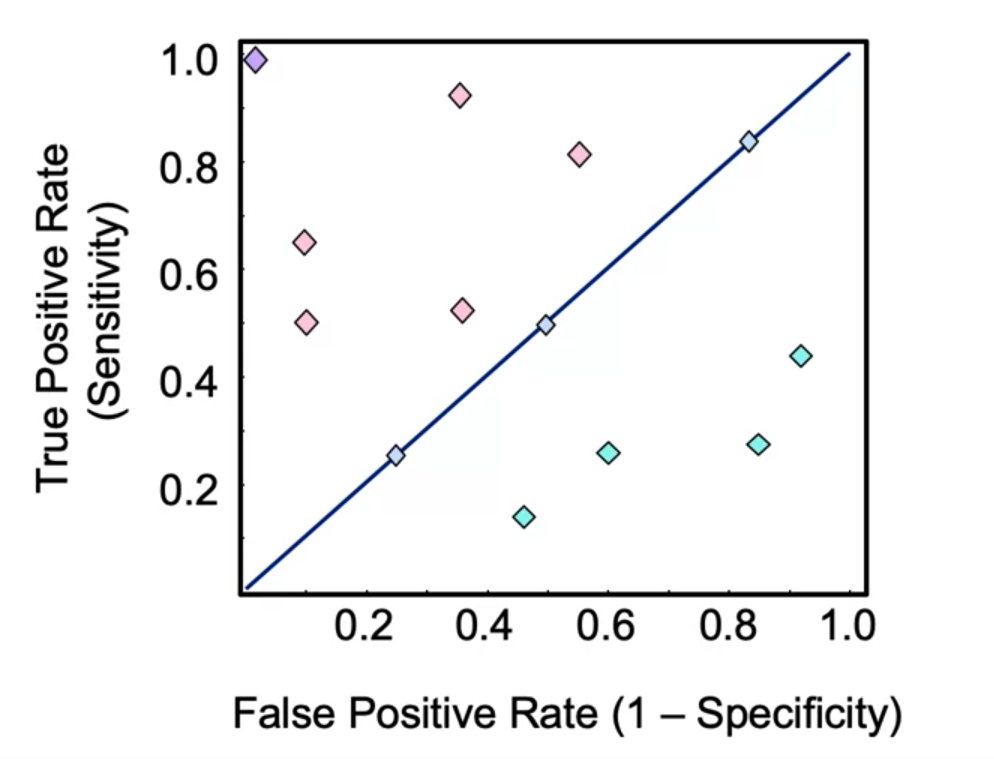
</div>

- If we got all of our negatives correctly identified => **false positive rate** is zero 


- For every actual negative we predict incorrectly => **false positive rate** increases


- The ROC looks at the predictive probabilities that we output which is going to be a **list of scores** and then it plots for certain thresholds

<div>
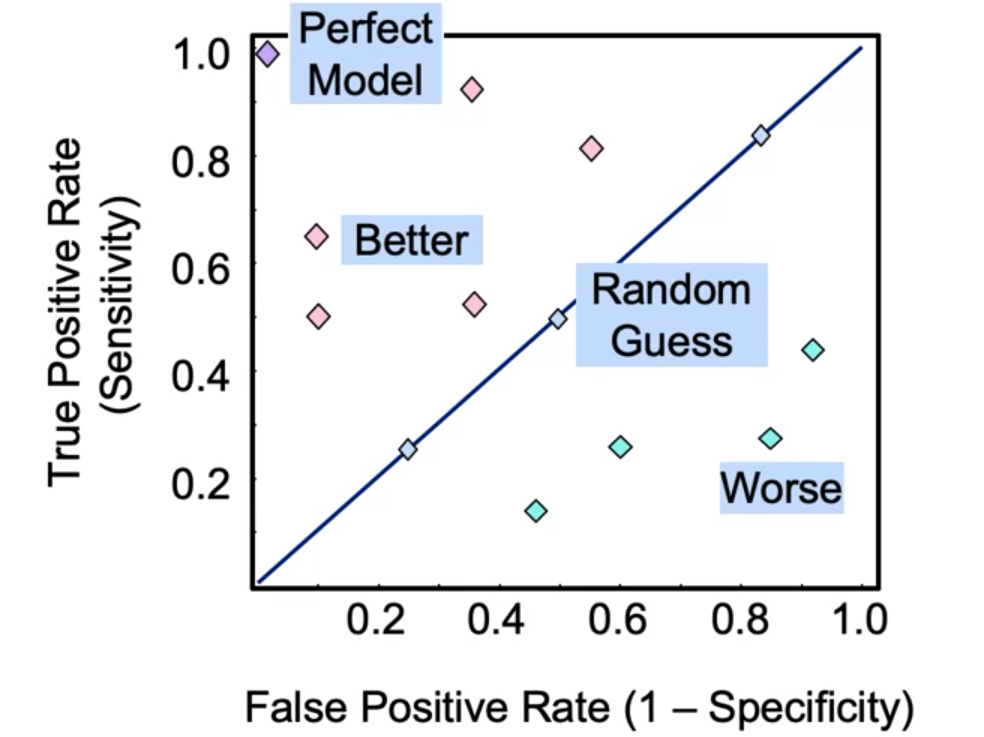
</div>

## ROC AUC

Is the ROC Area Under the Curve, gives a measure of how **well we are separating the two classes**. Similar to the F1 Score as it is a balance metric.

<div>
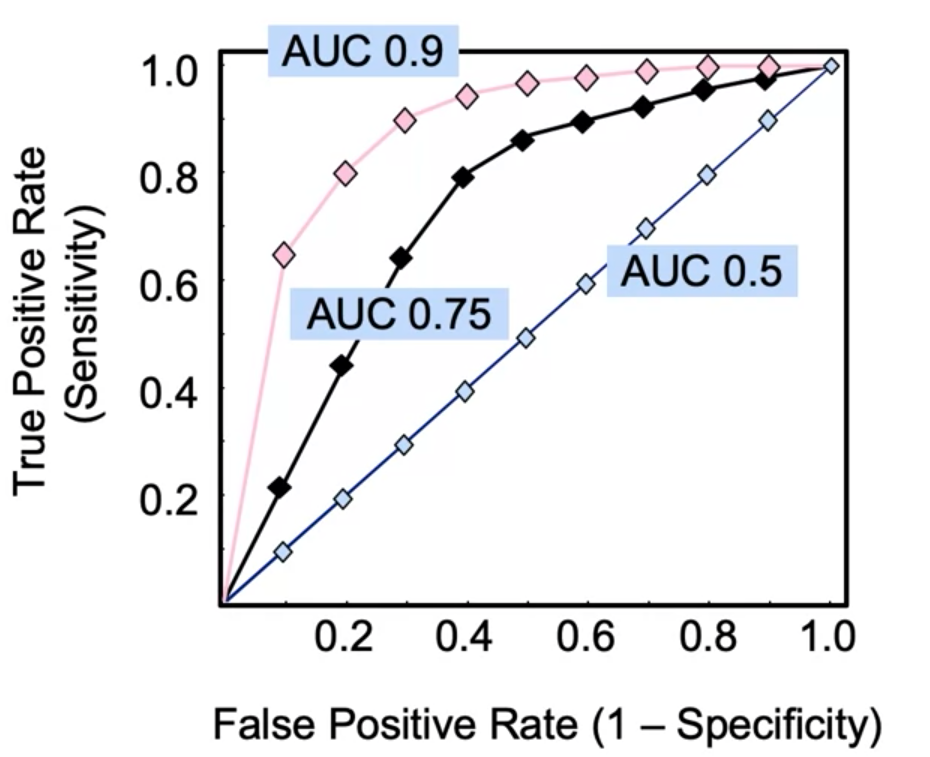
</div>

## Precision-Recall Curve

**Works generally better for data with unbalanced classes**

Measures the trade-off between precision and recall for various score thresholds.

This is an unbalanced metric and will mostly be a decreasing curve

<div>
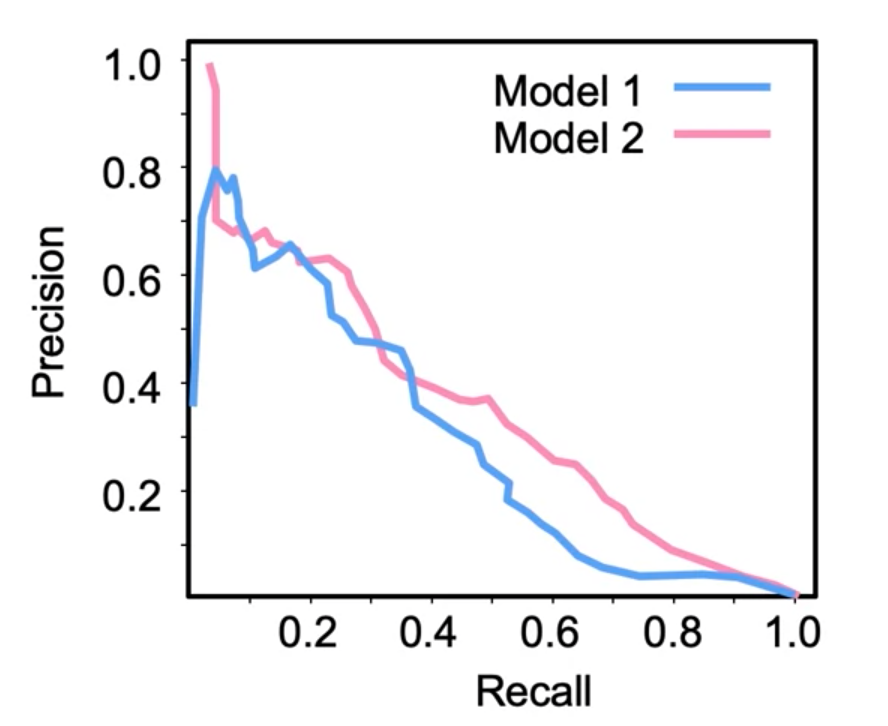
</div>

## Multiple-Class Error Metrics

Most are similar to the binary version, they just exand the elements as a sum, however, there are no direct generalizations of ROC, precision-recall, specificity, etc. but we can look at them under a **One Versus All** approach instead.

Important to also not what is the cost of misclassifying one class as the other?

# Error Metrics in Python

For each model, calculate the following error metrics: 

* Accuracy
* Precision
* Recall
* F-score
* Confusion Matrix

Decide how to combine the multi-class metrics into a single value for each model.

In [69]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Precision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data (OHC)
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, save the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [70]:
metrics

,lr,l1,l2
precision,0.984144,0.983514,0.983824
recall,0.984142,0.983495,0.983819
fscore,0.984143,0.983492,0.983819
accuracy,0.984142,0.983495,0.983819
auc,0.990384,0.989949,0.990165


Display or plot the confusion matrix for each model.

Across the rows we have the actual classes and across the columns we have what was predicted.

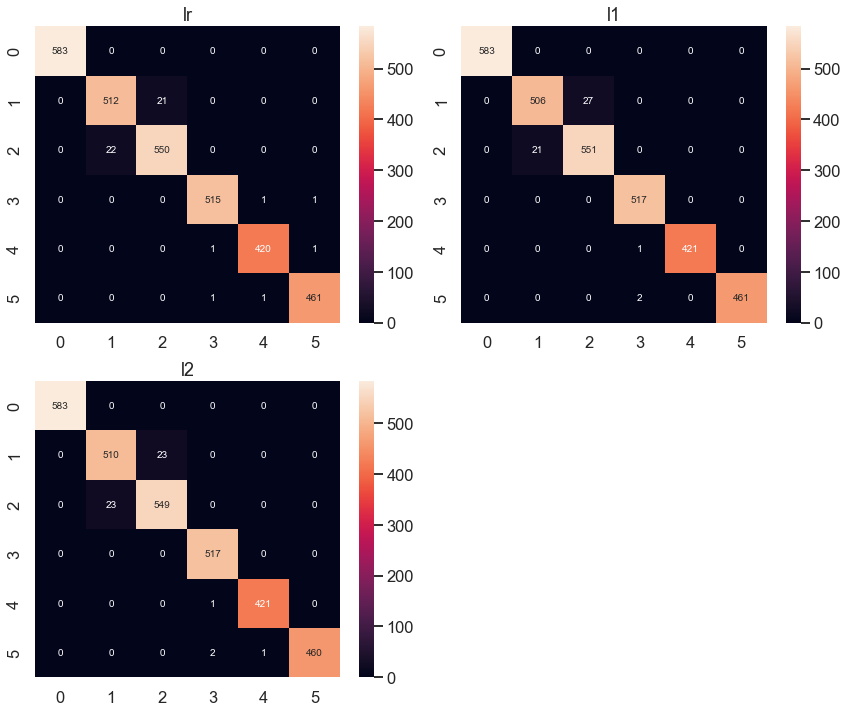

In [73]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()